# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:
#use index col to make sure first column is used as index
boston = pd.read_csv('Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.shape

(506, 14)

In [4]:
'''
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n"

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

<AxesSubplot:>

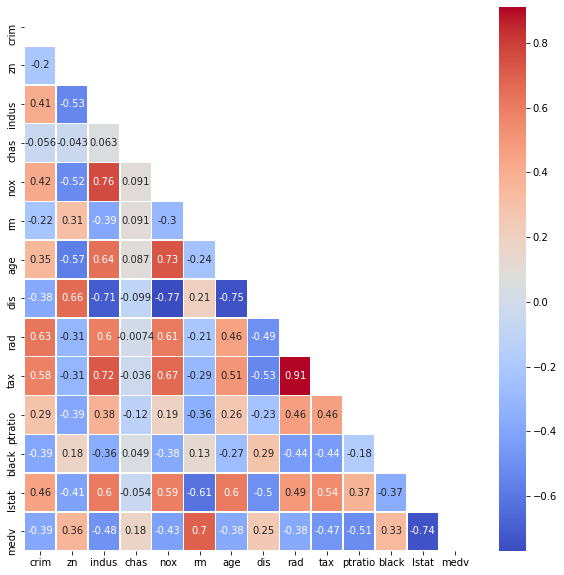

In [5]:
corr = boston.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, cmap = 'coolwarm', mask=mask, annot = True, linewidths=.5)

So 'rm' (= average rooms per dwelling) is highest positive correlation with median value of owner-occupied homes
'LSTAT' (= % lower status of the population) is lowest positive correlation with median value of owner-occupied homes

<AxesSubplot:xlabel='rm', ylabel='medv'>

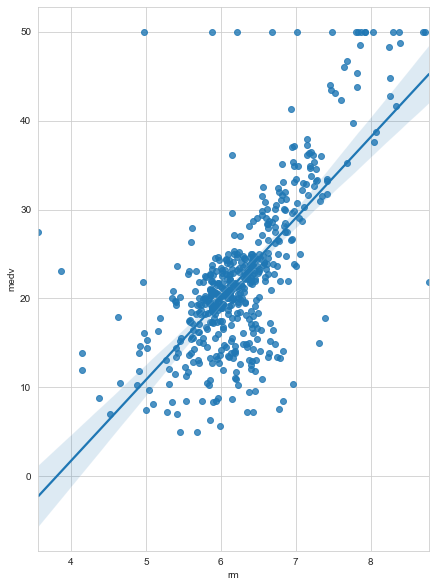

In [6]:
#highest positive correlation
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'rm', y = 'medv', data = boston, ax = ax)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

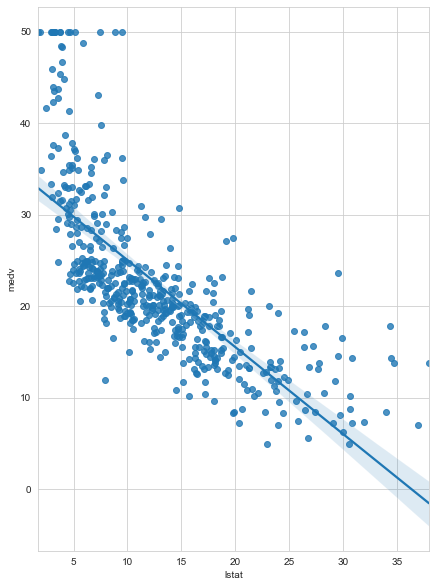

In [7]:
#highest negative correlation
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'lstat', y = 'medv', data = boston, ax = ax)

<AxesSubplot:xlabel='ptratio', ylabel='medv'>

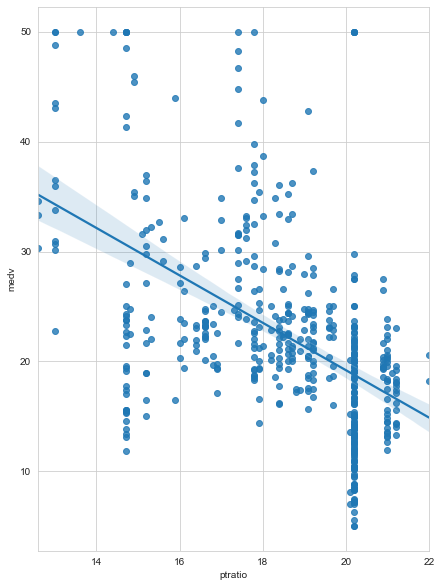

In [8]:
#medium correlation (pupil-teacher ratio by town)
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'ptratio', y = 'medv', data = boston, ax = ax)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

<AxesSubplot:xlabel='chas', ylabel='medv'>

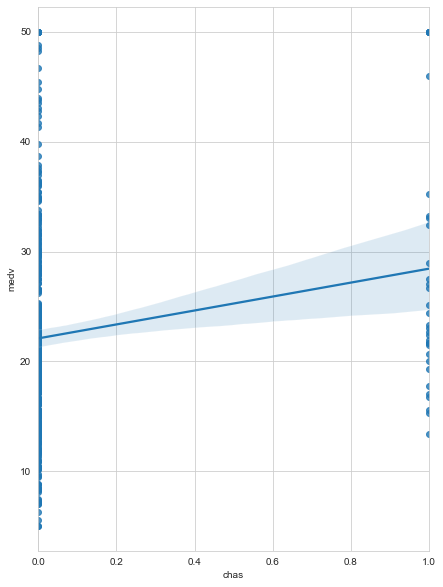

In [9]:
#example where there is very low correlation
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'chas', y = 'medv', data = boston, ax = ax)

In [10]:
#Higher average rooms per dwelling (rm) is higher house price
#The higher % lower status of the population (lstat) the lower the house prices
#Both relationships can be expected

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [11]:
#oops, i already did a heatmap

#### Significant correlations


In [12]:
#see above

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [13]:
boston.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [14]:
from sklearn.model_selection import train_test_split

X = boston.drop('medv', axis=1)  
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21, shuffle = True)

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [15]:
from sklearn.ensemble import RandomForestRegressor

def RFR_function (x):
    #instantiate
    model = RandomForestRegressor(max_depth = x)
    #fit
    model.fit(X_train, y_train)
    return model

def scoring_model (model):
    print(f'Score of training set of {model} is {round(model.score(X_train, y_train),2)}')
    print(f'Score of test set of {model} is {round(model.score(X_test, y_test),2)}')

In [16]:
model2 = RFR_function(2) 
model4 = RFR_function(4) 
model6 = RFR_function(6) 
model8 = RFR_function(8) 
model10 = RFR_function(10) 

In [17]:
scoring_model(model2)
print('\n')
scoring_model(model4)
print('\n')
scoring_model(model6)
print('\n')
scoring_model(model8)
print('\n')
scoring_model(model10)

Score of training set of RandomForestRegressor(max_depth=2) is 0.77
Score of test set of RandomForestRegressor(max_depth=2) is 0.74


Score of training set of RandomForestRegressor(max_depth=4) is 0.91
Score of test set of RandomForestRegressor(max_depth=4) is 0.87


Score of training set of RandomForestRegressor(max_depth=6) is 0.95
Score of test set of RandomForestRegressor(max_depth=6) is 0.89


Score of training set of RandomForestRegressor(max_depth=8) is 0.97
Score of test set of RandomForestRegressor(max_depth=8) is 0.89


Score of training set of RandomForestRegressor(max_depth=10) is 0.98
Score of test set of RandomForestRegressor(max_depth=10) is 0.9


In [18]:
#add training scores to a list
training_scores = [model2.score(X_train, y_train), model4.score(X_train, y_train), model6.score(X_train, y_train), \
            model8.score(X_train, y_train), model10.score(X_train, y_train)]

In [19]:
#add test scores to a list
test_scores = [model2.score(X_test, y_test), model4.score(X_test, y_test), model6.score(X_test, y_test), \
            model8.score(X_test, y_test), model10.score(X_test, y_test)]

In [20]:
plotscores = pd.DataFrame.from_dict({'max_depth': [2, 4, 6, 8, 10], 'training_score' : training_scores, 
 'test_score' : test_scores})
plotscores

,max_depth,training_score,test_score
0,2,0.771616,0.737636
1,4,0.910794,0.867501
2,6,0.950746,0.885376
3,8,0.970180,0.889310
4,10,0.976454,0.897514


Now, plot the score for each tree on the training set and on the testing set.

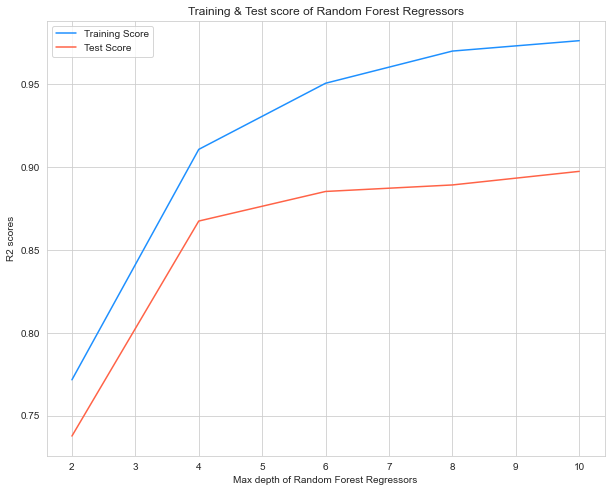

In [21]:
# Produce a plot with the score for the testing and training for the different max depths
plt.figure(figsize=(10,8))
x = plotscores.max_depth
y1 = plotscores.training_score
y2 = plotscores.test_score
plt.plot(x, y1, 'dodgerblue', label = 'Training Score')
plt.plot(x, y2, 'tomato', label = 'Test Score')
plt.legend()
plt.title('Training & Test score of Random Forest Regressors')
plt.xlabel('Max depth of Random Forest Regressors')
plt.ylabel('R2 scores')
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [22]:
# The deeper the tree, the better the training and test scores, but I think we also have a risk of overfitting with training
# scores that are > 0.9

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [23]:
# Max depth of 1 means high bias, because we probably underfit, but less variance 
# Max depth of 10 means low bias, but probably higher variance of overfitting

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [24]:
# The scores show that max depth of 10 is the best
y_pred = model10.predict(X_test)

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.2271648768885934

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [26]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

3.1055259318444284

#### Create a function that calculates  and returns the r2 score as performance metric

In [27]:
from sklearn.metrics import r2_score

def r2score_ML(model):
    return round(model.score(X_train, y_train),2)

#### Calculate the r2 score of the model using the function defined above

In [28]:
print(f'R2 score of RandomForestRegressor(max_depth=10) is {r2score_ML(model10)}')

R2 score of RandomForestRegressor(max_depth=10) is 0.98


#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [29]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [30]:
# As the data is very old, we should not use this model anymore. Furhermore, some of the features have a very low correlation. 
# Also we cannot use the model of this city in oter cities or villages